<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/ByteNav/Features_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Feature Engineering
## Group: Byte Navigators (ByteNav)

## Group Member:
<table>
  <tr>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <th>LAU YEE CHI</th>
    <th>A21EC0042</th>
  </tr>
  </tr>
    <tr>
    <th>YEW RUI XIANG</th>
    <th>A21EC0149</th>
  </tr>
  <tr>
    <th>SOO WAN YING</th>
    <th>A21EC0227</th>
  <tr>
    <th>LOO ZHI YUAN</th>
    <th>A21EC0197</th>
  </tr>
</table>


## 1. Dataset Selection
We have choose a large dataset which contains 5.7 million new and used vehicle listings (~2M unique vins) from aprox 1.2k dealers in Illinois from June 2018 to June 2020 with a daily resolution. The data is provided as a sample from [AutoDealerData.com](https://autodealerdata.com/?ref=kaggle).

The title of the dataset is "**Large Car Dataset**" and the dataset used is from **CIS_Automotive_Kaggle_Sample.csv**. The dataset consist of 5.7M rows and 156 columns. Our main purpose working on this dataset is preparing it through a series of data cleaning and feature engineering technique to construct a model for predicting the **"askPrice"** which are last ask price before the vehicle was sold. For seeking more details of each attributes, go ahead the below source link.

Source of dataset:
https://www.kaggle.com/datasets/cisautomotiveapi/large-car-dataset

## 2. Loading the Dataset

### Install required packages

In [ ]:
# install opendatasets for reading the dataset from kaggle
!pip install opendatasets

In [ ]:
# install scikit-learn packages
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


### Import required libraries

In [ ]:
# import required datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od

### Import Dataset

In [ ]:
# download and assign the csv file into variable named file
od.download(
    "https://www.kaggle.com/datasets/cisautomotiveapi/large-car-dataset")

file = ('large-car-dataset/CIS_Automotive_Kaggle_Sample.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yewruixiang
Your Kaggle Key: ··········


100%|██████████| 825M/825M [00:04<00:00, 210MB/s]


The dimensionality of this dataset is too large and unable to support by the RAM of the Google Colad. Therefore, we first loop through chunk of the dataset to get the number of missing values in each columns before dropping the columns with the null values greater 40% out of the size of the dataset.

In [ ]:
# Chunk the datasets into 1000000 chunk size each
chunksize = 1000000
null_values_columns = [0] * 156
total_rows = 0

# Specific the datatypes of certain columns
dtypes={"interiorColor":object, "vf_AxleConfiguration":object, "vf_BatteryInfo":object, "vf_BatteryType":object,
        "vf_BrakeSystemDesc":object, "vf_MakeID":np.float64, "vf_ManufacturerId":np.float64, "vf_ModelID":np.float64,
        "vf_ModelYear":np.float64, "vf_NCSANote":object, "vf_OtherMotorcycleInfo":object, "vf_PossibleValues":object,
        "vf_Trim2":object,}

for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
  # read null value in each columns
  null_values_columns += chunk.isnull().sum()
  total_rows += chunk.shape[0]

# Examine the columns which have the null values less than 40% out of the total size
columns_need = (null_values_columns/total_rows) < 0.4

<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,22,25,53,65,67,69,70,91,122) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,18,53,65,67,69,79,91,122,133) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,18,25,53,65,67,69,91,122,133) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarning: Columns (1,8,17,18,25,53,65,67,69,91,113,122,133) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes):
<ipython-input-6-7a3af86cdc9f>:12: DtypeWarni

In [ ]:
# Identify the columns to retain for use
columns_need_index = columns_need[columns_need == True].index
print("Number of columns remain for used: " + str(len(columns_need_index)))
print("Columns remain for used: " + str(columns_need_index))

Number of columns remain for used: 47
Columns remain for used: Index(['vin', 'stockNum', 'firstSeen', 'lastSeen', 'msrp', 'askPrice',
       'mileage', 'isNew', 'color', 'brandName', 'modelName', 'dealerID',
       'vf_AirBagLocFront', 'vf_AirBagLocSide', 'vf_BodyClass',
       'vf_BusFloorConfigType', 'vf_BusType', 'vf_CustomMotorcycleType',
       'vf_DisplacementCC', 'vf_DisplacementCI', 'vf_DisplacementL',
       'vf_Doors', 'vf_DriveType', 'vf_EngineConfiguration',
       'vf_EngineCylinders', 'vf_FuelTypePrimary', 'vf_GVWR', 'vf_Make',
       'vf_MakeID', 'vf_Manufacturer', 'vf_ManufacturerId', 'vf_Model',
       'vf_ModelID', 'vf_ModelYear', 'vf_MotorcycleChassisType',
       'vf_MotorcycleSuspensionType', 'vf_PlantCity', 'vf_PlantCompanyName',
       'vf_PlantCountry', 'vf_PlantState', 'vf_SeatBeltsAll', 'vf_Series',
       'vf_TPMS', 'vf_TrailerBodyType', 'vf_TrailerType', 'vf_VIN',
       'vf_VehicleType'],
      dtype='object')


### Sampling

Sampling method is carried out to retrieve the random sample from the dataset. The similar is that we used chunk of the dataset by filtering out the rows with null values and select a random set of rows/data from the chunk. The random sample is then stored in a dataframe(df).

In [ ]:
# Use sampling method to read the dataset for furture processing
chunksize = 1000000
df = pd.DataFrame()
dtypes={"interiorColor":object, "vf_AxleConfiguration":object, "vf_BatteryInfo":object, "vf_BatteryType":object,
        "vf_BrakeSystemDesc":object, "vf_MakeID":np.float64, "vf_ManufacturerId":np.float64, "vf_ModelID":np.float64,
        "vf_ModelYear":np.float64, "vf_NCSANote":object, "vf_OtherMotorcycleInfo":object, "vf_PossibleValues":object,
        "vf_Trim2":object,}

for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
  # Drop the row consisting null value to make sure no null value in any columns in our sample data for ease of data processing
  chunk = chunk.dropna()
  # Select random set of data from the chunk with specified fraction which is 0.25
  chunk = chunk.sample(frac=0.25, random_state=99)
  # Concatenate the dataframe from each chunk
  df = pd.concat([df, chunk], ignore_index=True)

df.shape

<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize, dtype=dtypes, usecols=columns_need_index):
<ipython-input-8-9c88403a51f5>:9: DtypeWarning: Columns (1,8) have m

(116349, 47)

In [ ]:
df

,vin,stockNum,firstSeen,lastSeen,msrp,askPrice,mileage,isNew,color,brandName,...,vf_PlantCompanyName,vf_PlantCountry,vf_PlantState,vf_SeatBeltsAll,vf_Series,vf_TPMS,vf_TrailerBodyType,vf_TrailerType,vf_VIN,vf_VehicleType
0,a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4c...,J79183-1,2019-12-05,2020-05-06,36465,28689,7736,False,Billet Silver Metallic Clearcoat,JEEP,...,BELVIDERE ASSEMBLY,UNITED STATES (USA),ILLINOIS,Manual,Trailhawk,Direct,Not Applicable,Not Applicable,a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4c...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
1,8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0...,12649F,2020-05-03,2020-05-21,14887,14505,0,False,Billet Clearcoat,DODGE,...,Toluca Assembly,MEXICO,STATE OF MEXICO,Manual,SXT,Direct,Not Applicable,Not Applicable,8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
2,4bb08e5895ac1e226fc35d37e913eb071cea8ce789cc24...,Touring L Plus,2018-08-13,2018-10-16,0,0,0,True,Brilliant Black Crystal Pearl-Coat Exterior Paint,CHRYSLER,...,Windsor Assembly,CANADA,ONTARIO,Manual,Touring L Plus,Direct,Not Applicable,Not Applicable,4bb08e5895ac1e226fc35d37e913eb071cea8ce789cc24...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
3,f9225fe0632a6b379ff2e6b719f247d842fe3d850c70c8...,R/T,2018-12-14,2019-01-12,0,0,0,True,DB Black Exterior Paint,DODGE,...,JEFFERSON NORTH ASSEMBLY,UNITED STATES (USA),MICHIGAN,Manual,R/T,Direct,Not Applicable,Not Applicable,f9225fe0632a6b379ff2e6b719f247d842fe3d850c70c8...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
4,c909e6c0ff580f7eb53ac519faaef9e5e2de4fcc79ea2f...,38057,2018-08-05,2018-10-10,29895,28895,12528,False,Sandy Ridge,CHEVROLET,...,CAMI,CANADA,ONTARIO,Manual,Premier (1LZ),Direct,Not Applicable,Not Applicable,c909e6c0ff580f7eb53ac519faaef9e5e2de4fcc79ea2f...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116344,143161f59a0a4551989610615430af855e9637706e8a34...,181459,2018-09-11,2018-09-13,83695,83695,0,True,Mocha,LINCOLN,...,Kentucky Truck,UNITED STATES (USA),KENTUCKY,Manual,Reserve,Direct,Not Applicable,Not Applicable,143161f59a0a4551989610615430af855e9637706e8a34...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
116345,6485bbd0739fc161914c7cbbde019e370a14a0fb1b17b7...,27527A,2018-11-16,2018-12-29,25500,25500,0,False,Siren Red Tintcoat,CHEVROLET,...,GMNA,UNITED STATES (USA),MICHIGAN,Manual,1LT,Direct,Not Applicable,Not Applicable,6485bbd0739fc161914c7cbbde019e370a14a0fb1b17b7...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
116346,a2f4a91d3441f1f8e90a3fd6164b4bdcaea9e4a4806119...,N190484,2018-11-02,2018-11-02,40950,40950,0,True,Billet Silver Metallic Clearcoat,JEEP,...,BELVIDERE ASSEMBLY,UNITED STATES (USA),ILLINOIS,Manual,Limited,Direct,Not Applicable,Not Applicable,a2f4a91d3441f1f8e90a3fd6164b4bdcaea9e4a4806119...,MULTIPURPOSE PASSENGER VEHICLE (MPV)
116347,abe751eccaec60d0e1e9b7b3faca2261e8734459bc65af...,GUC67244,2019-02-27,2019-07-08,19990,19200,39670,False,Oxford White,FORD,...,Louisville Assembly,UNITED STATES (USA),KENTUCKY,Manual,SE,Direct,Not Applicable,Not Applicable,abe751eccaec60d0e1e9b7b3faca2261e8734459bc65af...,MULTIPURPOSE PASSENGER VEHICLE (MPV)


## 3. Data Preprocessing & Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(116349, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116349 entries, 0 to 116348
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   vin                          116349 non-null  object 
 1   stockNum                     116349 non-null  object 
 2   firstSeen                    116349 non-null  object 
 3   lastSeen                     116349 non-null  object 
 4   msrp                         116349 non-null  int64  
 5   askPrice                     116349 non-null  int64  
 6   mileage                      116349 non-null  int64  
 7   isNew                        116349 non-null  bool   
 8   color                        116349 non-null  object 
 9   brandName                    116349 non-null  object 
 10  modelName                    116349 non-null  object 
 11  dealerID                     116349 non-null  int64  
 12  vf_AirBagLocFront            116349 non-null  object 
 13 

There might be no null values for each columns since we are filtering the null row of data during extracting the sample of dataset.

In [ ]:
# sum of null values in each columns
df.isnull().sum()

vin                            0
stockNum                       0
firstSeen                      0
lastSeen                       0
msrp                           0
askPrice                       0
mileage                        0
isNew                          0
color                          0
brandName                      0
modelName                      0
dealerID                       0
vf_AirBagLocFront              0
vf_AirBagLocSide               0
vf_BodyClass                   0
vf_BusFloorConfigType          0
vf_BusType                     0
vf_CustomMotorcycleType        0
vf_DisplacementCC              0
vf_DisplacementCI              0
vf_DisplacementL               0
vf_Doors                       0
vf_DriveType                   0
vf_EngineConfiguration         0
vf_EngineCylinders             0
vf_FuelTypePrimary             0
vf_GVWR                        0
vf_Make                        0
vf_MakeID                      0
vf_Manufacturer                0
vf_Manufac

In [ ]:
df.describe()

,msrp,askPrice,mileage,dealerID,vf_DisplacementCC,vf_DisplacementCI,vf_DisplacementL,vf_Doors,vf_EngineCylinders,vf_MakeID,vf_ManufacturerId,vf_ModelID,vf_ModelYear
count,1.163490e+05,1.163490e+05,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000,116349.000000
mean,5.641291e+05,1.182654e+05,17783.287695,19391.166155,3003.576997,183.319327,3.004319,4.097998,5.243423,469.121720,1013.036794,3287.714179,2017.308709
std,3.389935e+07,1.407736e+07,30864.313163,10644.093253,928.069208,56.641326,0.928046,0.359426,1.121652,15.263991,503.324161,4281.946255,2.232024
min,0.000000e+00,0.000000e+00,0.000000,190.000000,1300.000000,79.330867,1.300000,2.000000,3.000000,448.000000,962.000000,1797.000000,2008.000000
25%,1.914400e+04,1.790000e+04,0.000000,10556.000000,2400.000000,146.456986,2.400000,4.000000,4.000000,460.000000,976.000000,1800.000000,2017.000000
50%,2.799900e+04,2.557700e+04,0.000000,21197.000000,3500.000000,213.583104,3.500000,4.000000,6.000000,467.000000,984.000000,1939.000000,2018.000000
75%,3.699800e+04,3.411600e+04,26874.000000,27980.000000,3600.000000,219.685479,3.600000,4.000000,6.000000,478.000000,994.000000,2217.000000,2019.000000
max,2.147484e+09,2.147484e+09,377868.000000,39979.000000,6600.000000,402.756711,6.600000,5.000000,8.000000,1056.000000,16405.000000,25919.000000,2020.000000


The unique values in each columns is examined to make decisions on the needs to drop the no variability columns and changing to the suitable datatypes.

In [ ]:
No_variability_column = []
for column in df.columns:
  # Drop columns which does not have variability (no variability column contribute nothing for analysis)
  if len(df[column].unique()) == 1:
    df.drop(columns=column, inplace=True)
    No_variability_column.append(column)
    continue

  # Change the datatype of the column with less unique value to categorical type
  if len(df[column].unique()) < 2000 and column != 'isNew':
    if column == 'vf_DisplacementCC' or column == 'vf_DisplacementCI' or column == 'vf_DisplacementL':
      df[column] = df[column].astype('float64')
    else:
      if column in ['vf_Doors', 'vf_EngineCylinders', 'vf_MakeID', 'vf_ManufacturerId', 'vf_ModelID', 'vf_ModelYear']:
        df[column] = df[column].astype('int64')
      df[column] = df[column].astype('category')

  print("Unique values in {}: {}".format(column, len(df[column].unique())))

print("Columns which does not have variability and dropped: {}".format(No_variability_column))

Unique values in vin: 83750
Unique values in stockNum: 76968
Unique values in firstSeen: 1275
Unique values in lastSeen: 731
Unique values in msrp: 20090
Unique values in askPrice: 27380
Unique values in mileage: 27786
Unique values in isNew: 2
Unique values in color: 1966
Unique values in brandName: 20
Unique values in modelName: 63
Unique values in dealerID: 1120
Unique values in vf_AirBagLocSide: 4
Unique values in vf_BodyClass: 8
Unique values in vf_DisplacementCC: 33
Unique values in vf_DisplacementCI: 33
Unique values in vf_DisplacementL: 30
Unique values in vf_Doors: 3
Unique values in vf_DriveType: 6
Unique values in vf_EngineConfiguration: 2
Unique values in vf_EngineCylinders: 5
Unique values in vf_FuelTypePrimary: 4
Unique values in vf_GVWR: 8
Unique values in vf_Make: 20
Unique values in vf_MakeID: 20
Unique values in vf_Manufacturer: 16
Unique values in vf_ManufacturerId: 16
Unique values in vf_Model: 63
Unique values in vf_ModelID: 63
Unique values in vf_ModelYear: 13
Uni

Examined the unique values in each columns.

In [ ]:
i = 0
for column in df.columns:
  print(str(i) + ": Columns " + column)
  print(df[column].unique())
  print()
  i += 1

0: Columns vin
['a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4cf14025218a8a14756c'
 '8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0143f69e05664467ff9'
 '4bb08e5895ac1e226fc35d37e913eb071cea8ce789cc241863633abbb0b03051' ...
 '143161f59a0a4551989610615430af855e9637706e8a34dbcd21a7423890c42f'
 '6485bbd0739fc161914c7cbbde019e370a14a0fb1b17b7825c24d3fa4d8fcaae'
 'a2f4a91d3441f1f8e90a3fd6164b4bdcaea9e4a4806119a62064314997946129']

1: Columns stockNum
['J79183-1' '12649F' 'Touring L Plus' ... 'J21003' '181459' '27527A']

2: Columns firstSeen
['2019-12-05', '2020-05-03', '2018-08-13', '2018-12-14', '2018-08-05', ..., '2017-02-26', '2017-11-13', '2017-06-26', '2017-05-14', '2017-04-02']
Length: 1275
Categories (1275, object): ['2016-05-17', '2016-05-30', '2016-06-19', '2016-06-29', ..., '2020-05-29',
                            '2020-05-30', '2020-05-31', '2021-03-04']

3: Columns lastSeen
['2020-05-06', '2020-05-21', '2018-10-16', '2019-01-12', '2018-10-10', ..., '2020-03-30', '2020-01-19', '2

In [ ]:
df.dtypes

vin                         object
stockNum                    object
firstSeen                 category
lastSeen                  category
msrp                         int64
askPrice                     int64
mileage                      int64
isNew                         bool
color                     category
brandName                 category
modelName                 category
dealerID                  category
vf_AirBagLocSide          category
vf_BodyClass              category
vf_DisplacementCC          float64
vf_DisplacementCI          float64
vf_DisplacementL           float64
vf_Doors                  category
vf_DriveType              category
vf_EngineConfiguration    category
vf_EngineCylinders        category
vf_FuelTypePrimary        category
vf_GVWR                   category
vf_Make                   category
vf_MakeID                 category
vf_Manufacturer           category
vf_ManufacturerId         category
vf_Model                  category
vf_ModelID          

In [ ]:
# Convert some columns to datetime
df['firstSeen'] = pd.to_datetime(df['firstSeen'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [ ]:
# Convert some columns to float64
df['askPrice'] = df['askPrice'].astype('float64')
df['msrp'] = df['msrp'].astype('float64')

Examined the duplicated rows and columns of the sample dataset. Drop if exists.

In [ ]:
# Examined the duplicated rows
df.duplicated().sum()

0

In [ ]:
# Examined the duplicated rows
df.T.duplicated().sum()

3

In [ ]:
# Identified duplicated columns
dulplicated_columns = df.T.duplicated().index[df.T.duplicated()]
dulplicated_columns

Index(['vf_Make', 'vf_Model', 'vf_VIN'], dtype='object')

In [ ]:
# Drop duplicated columns
df.drop(dulplicated_columns, axis='columns', inplace=True)

Examined the columns **askPrice** and **msrp** to remove the data with less than of equal to 0 value.

In [ ]:
((df['askPrice'] <= 0) | (df['msrp'] <= 0))

0         False
1         False
2          True
3          True
4         False
          ...  
116344    False
116345    False
116346    False
116347    False
116348    False
Length: 116349, dtype: bool

In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
# Drop the target value columns with 0 values askPrice
df = df[~((df['askPrice'] == 0) & (df['msrp'] == 0))]
df.head()

,vin,stockNum,firstSeen,lastSeen,msrp,askPrice,mileage,isNew,color,brandName,...,vf_ManufacturerId,vf_ModelID,vf_ModelYear,vf_PlantCity,vf_PlantCompanyName,vf_PlantCountry,vf_PlantState,vf_Series,vf_TPMS,vf_VehicleType
0,a1a36f314b932519ae0856f048fbb4b7b421eed83a6d4c...,J79183-1,2019-12-05,2020-05-06,36465.0,28689.0,7736,False,Billet Silver Metallic Clearcoat,JEEP,...,994,1945,2019,BELVIDERE,BELVIDERE ASSEMBLY,UNITED STATES (USA),ILLINOIS,Trailhawk,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
1,8af4e1bc548aeac631afa916a182e7d1725b57ac7a69b0...,12649F,2020-05-03,2020-05-21,14887.0,14505.0,0,False,Billet Clearcoat,DODGE,...,1002,1939,2018,TOLUCA,Toluca Assembly,MEXICO,STATE OF MEXICO,SXT,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
4,c909e6c0ff580f7eb53ac519faaef9e5e2de4fcc79ea2f...,38057,2018-08-05,2018-10-10,29895.0,28895.0,12528,False,Sandy Ridge,CHEVROLET,...,984,1847,2018,INGERSOLL,CAMI,CANADA,ONTARIO,Premier (1LZ),Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
5,d8cf4360d8fca51da6130376c7fee2427aecb7f5e2a762...,HW577421,2019-03-09,2019-03-13,19399.0,19399.0,57478,False,Black,TOYOTA,...,1085,2217,2017,WOODSTOCK,Toyota Motor Manufacturing Canada Inc.,CANADA,ONTARIO,ASA44L/ASA42L/AVA44L,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)
6,12868f78b705eec3608cee144e8560cfb4884146f9ac0d...,J6454,2019-01-10,2019-04-03,42200.0,36113.0,0,True,Ocean Blue Metallic,JEEP,...,994,1943,2019,TOLEDO,TOLEDO NORTH ASSEMBLY,UNITED STATES (USA),OHIO,Unlimited Sport,Direct,MULTIPURPOSE PASSENGER VEHICLE (MPV)


## 4. Feature Selection

In [ ]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,msrp,askPrice,mileage,isNew,vf_DisplacementCC,vf_DisplacementCI,vf_DisplacementL
msrp,1.000000,0.415172,-0.008594,-0.014030,-0.004727,-0.004736,-0.004741
askPrice,0.415172,1.000000,-0.000843,-0.005505,-0.001386,-0.001390,-0.001392
mileage,-0.008594,-0.000843,1.000000,-0.506555,0.112192,0.112686,0.112537
isNew,-0.014030,-0.005505,-0.506555,1.000000,-0.094639,-0.094864,-0.094571
vf_DisplacementCC,-0.004727,-0.001386,0.112192,-0.094639,1.000000,0.999990,0.999987
vf_DisplacementCI,-0.004736,-0.001390,0.112686,-0.094864,0.999990,1.000000,0.999999
vf_DisplacementL,-0.004741,-0.001392,0.112537,-0.094571,0.999987,0.999999,1.000000


Since there are three columns which are highly correlated(vf_DisplacementCC, vf_DisplacementCI, vf_DisplacementL), we can reduce the dimensionality of the dataset by selecting one of those features or using the Principle Component Analysis (PCA). It uses to represent the relationships between numerical in lower-dimensional space  by computing principal components that capture the variability in the data.

### **Correlation for categorical data**

#### 1.Pearson Correlation Test
Pearson correlation Test is used to to calculate the correlation between continuous variables.

In [ ]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr

# Convert dataframe into series
dis_CC = df['vf_DisplacementCC']
dis_CI = df['vf_DisplacementCI']

# Apply the pearsonr()
corr, _ = pearsonr(dis_CC, dis_CI)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.99999


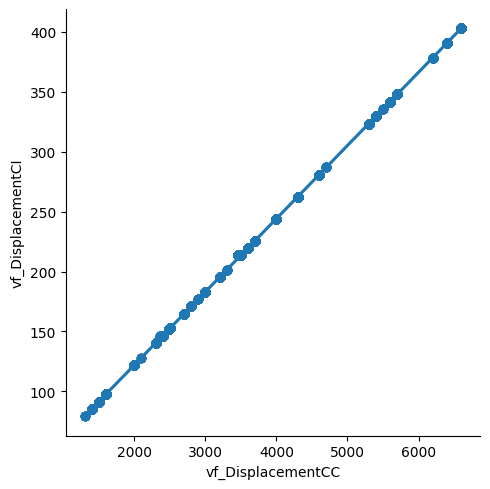

In [ ]:
sns.lmplot(x="vf_DisplacementCC", y="vf_DisplacementCI", data=df);

In [ ]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr

# Convert dataframe into series
msrp = df['msrp']
askprice = df['askPrice']

# Apply the pearsonr()
corr, _ = pearsonr(msrp, askprice)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.41517


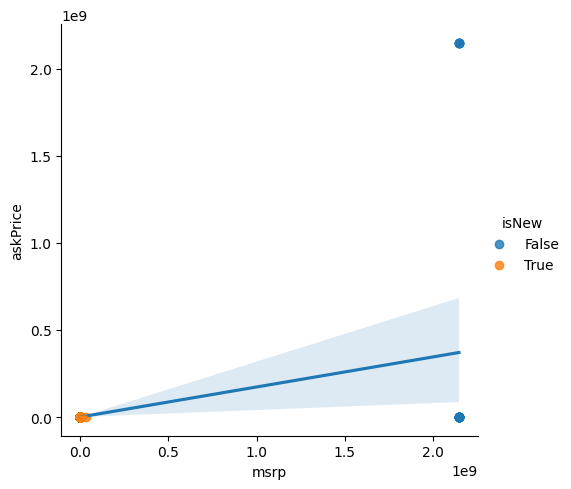

In [ ]:
sns.lmplot(x="msrp", y="askPrice", hue="isNew", data=df);

#### 2.Point-biserial Correlation
Testing on categorical and continuous variables

In [ ]:
import scipy.stats as stats
import pandas as pd
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
df['brandName_'] = le.fit_transform(df['brandName'])


<ipython-input-32-c9ce1c0e2ff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brandName_'] = le.fit_transform(df['brandName'])


In [ ]:
stats.pointbiserialr(df['brandName_'], df['askPrice'])

SignificanceResult(statistic=-0.007751549271218207, pvalue=0.012425254012963934)

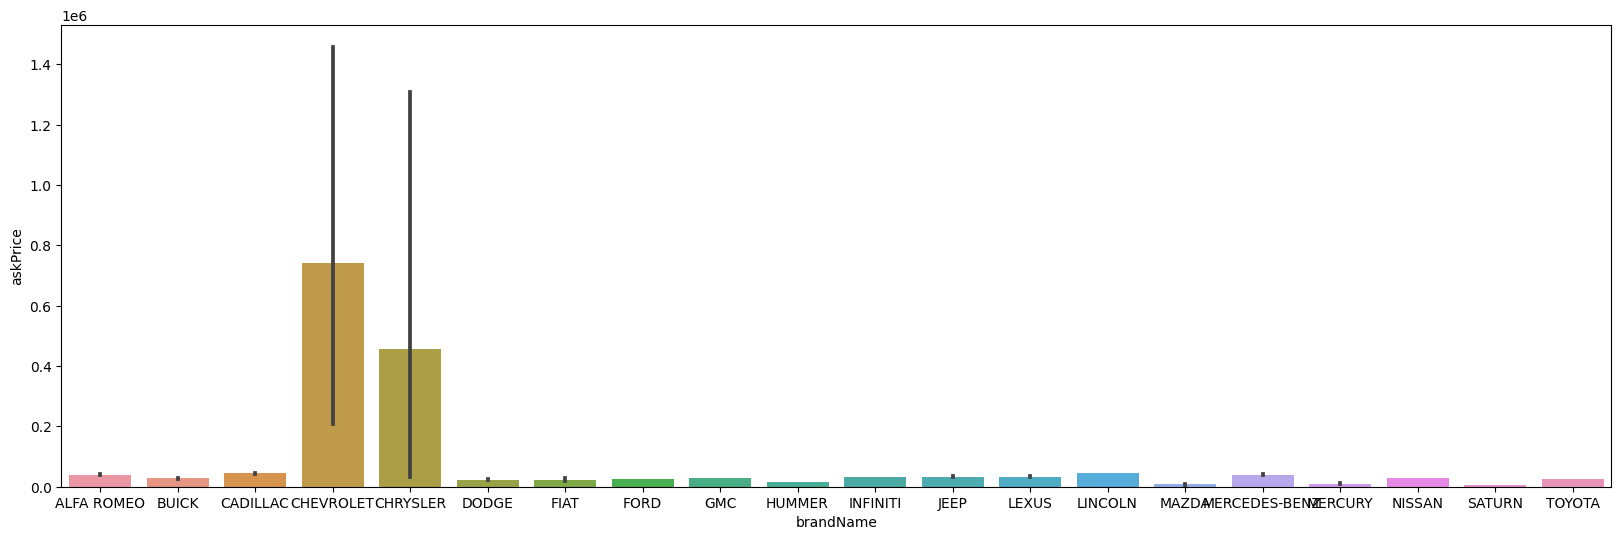

In [ ]:
plt.figure(figsize=(20,6))
ax= sns.barplot(x = 'brandName',y = 'askPrice',data = df)
plt.show()
for i, v in enumerate(list(df['askPrice'])):
   ax.text(i, v + 0.2, str(v), ha='center')
plt.show()

### Mutual Information
Mutual Information in that in measures a relationship between 2 quantities. It can detect any kind of relationship. We can know the values of a feature, how much confident can we know about the target. In this dataset, our target is `askPrice` which means the minimum price that a seller is willing to take for that same security.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("seaborn-whitegrid")

<ipython-input-36-44e8d52a7f21>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
X = df.copy()
y = X.pop('askPrice')


# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
for colname in X.select_dtypes("category"):
    X[colname], _ = X[colname].factorize()
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int


In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

vin                       7.372048
mileage                   1.710569
vf_ModelID                0.915354
vf_PlantCity              0.777733
vf_ModelYear              0.586629
vf_MakeID                 0.480240
firstSeen                 0.464819
lastSeen                  0.421389
vf_GVWR                   0.316791
vf_EngineCylinders        0.213294
vf_EngineConfiguration    0.175357
vf_VehicleType            0.035469
Name: MI Scores, dtype: float64

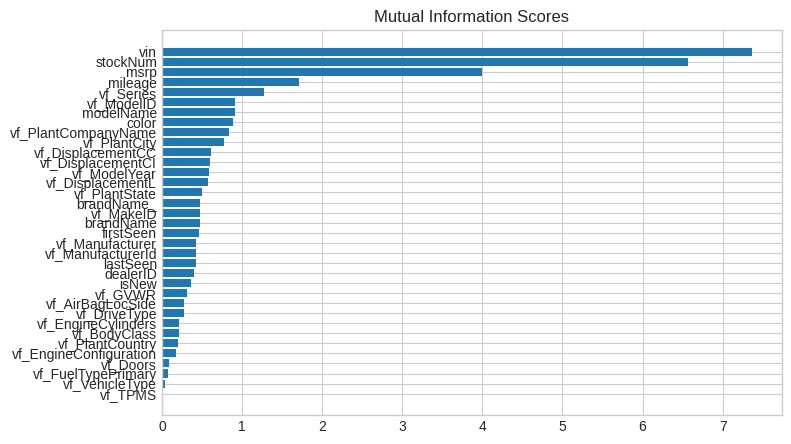

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

From the Mutual Infromation above, we can see that `vf_TPMS` has MI Scrore of 0.00, that shows that this field does not have relationship with others columns.
 **In real data feature engineering, the fields with score 0.0 can be dropped s it does not contributed to the searching insights and furture analysis.**

Besides `vin` (Vehicle Identication Number) and `stockNum` (StockNumber of the vehicle), `msrp` (Manufacturer's Suggested Retail Price - the price that a product's manufacturer recommends it be sold for at the point of sale) and `mileage` (how much the vehicle has been driven) have the highest MI scores. Thus, we will investigate the relationship between `askPrice`, `mileage` and `msrp`.

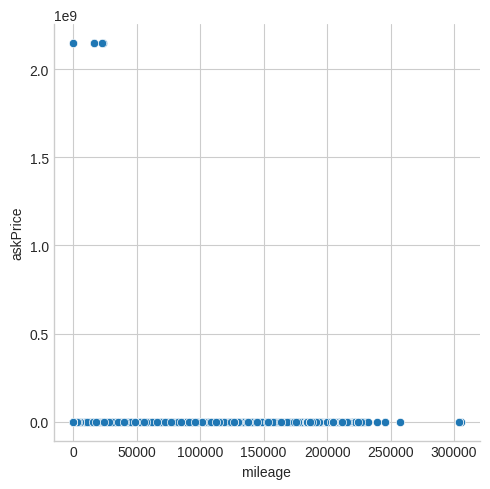

In [ ]:
sns.relplot(x="mileage", y="askPrice", data=df);

### 5. Feature Transformation

**Target Encoding** <br>
A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target. Target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.

In [ ]:
! pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')
#df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
print("Number of Unique Records: {}".format(df["vf_DisplacementCI"].nunique()))

Number of Unique Records: 33


<ipython-input-42-da9ca858e7cd>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In this feature, we set the target as `vf_DisplacementL` which gives the range in between 1.0 to 7.0. We want to see how is the features which our target field is inferenced by `vf_DisplacementCI`.

In [ ]:
X = df.copy()
y = X.pop('vf_DisplacementL')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [ ]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=['vf_DisplacementCI'], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

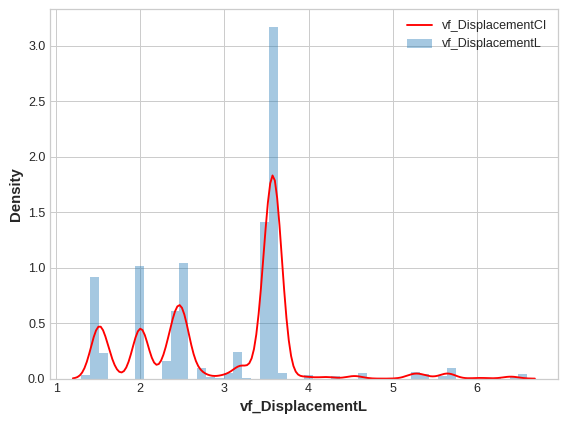

In [ ]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.vf_DisplacementCI, color='r', ax=ax)
ax.set_xlabel("vf_DisplacementL")
ax.legend(labels=['vf_DisplacementCI', 'vf_DisplacementL']);

*From the result above, we can see that the most `vf_DisplacementL` in vehicles is in between 3.0 and 4.0 as there is the highest peak in density in axis y.*

In this feature, our target value is `askPrice`. We want to see the relationship of model of year of vehicles and the asked price for vehicles to investigate how model Year of vehicle affect the asked price.

In [ ]:
df = df.astype({'vf_ModelYear':'int64'})
df.dtypes

vin                         object
stockNum                    object
firstSeen                 category
lastSeen                  category
msrp                       float64
askPrice                   float64
mileage                      int64
isNew                         bool
color                     category
brandName                 category
modelName                 category
dealerID                  category
vf_AirBagLocSide          category
vf_BodyClass              category
vf_DisplacementCC          float64
vf_DisplacementCI          float64
vf_DisplacementL           float64
vf_Doors                  category
vf_DriveType              category
vf_EngineConfiguration    category
vf_EngineCylinders        category
vf_FuelTypePrimary        category
vf_GVWR                   category
vf_MakeID                 category
vf_Manufacturer           category
vf_ManufacturerId         category
vf_ModelID                category
vf_ModelYear                 int64
vf_PlantCity        

In [ ]:
X = df.copy()
y = X.pop('vf_ModelYear')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [ ]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=['askPrice'], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

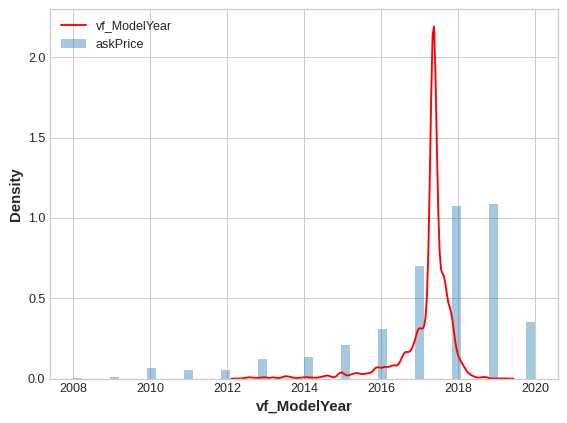

In [ ]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.askPrice, color='r', ax=ax)
ax.set_xlabel("vf_ModelYear")
ax.legend(labels=['vf_ModelYear', 'askPrice']);

*As we can observe in the graph above, the model Year in between 2016 and 2018 has the highest ranked asked price of vehicles as the peak shown. From the graph, we can do further investigation and prediction on the preference of people on prefering the vehicles made in particular years.*

## 6. Feature Creation

### K-Means Clustering
In the context of feature engineering for prediction, K-Mean is used of an unsupervised algorithm as a "feature discovery" technique to learn some property of the data, to represent the structure of the features in a certain way. The cluster generated for each row of data can be another features which useful to be used in model building.

In [ ]:
from sklearn.cluster import KMeans

In our dataset, we use our target `askPrice` and the features, `msrp` and `mileage` to obseve the patterns generated between them.

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [ ]:
X = df.loc[:, ["askPrice", "msrp", "mileage"]]
X.head()

,askPrice,msrp,mileage
0,28689.0,36465.0,7736
1,14505.0,14887.0,0
4,28895.0,29895.0,12528
5,19399.0,19399.0,57478
6,36113.0,42200.0,0


In [ ]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,askPrice,msrp,mileage,Cluster
0,28689.0,36465.0,7736,0
1,14505.0,14887.0,0,0
4,28895.0,29895.0,12528,0
5,19399.0,19399.0,57478,4
6,36113.0,42200.0,0,0


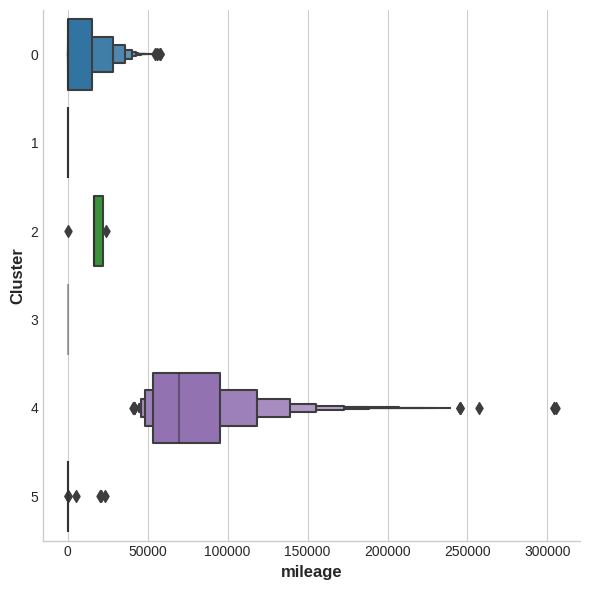

In [ ]:
X["mileage"] = df["mileage"]
sns.catplot(x="mileage", y="Cluster", data=X, kind="boxen", height=6);

In our dataset, we use our target `vf_DisplacementL` and the features, `vf_DisplacementCC` and `vf_DisplacementCI` to obseve the patterns generated between them.

In [ ]:
X = df.loc[:, ["vf_DisplacementCC", "vf_DisplacementCI", "vf_DisplacementL"]]
X.head()

,vf_DisplacementCC,vf_DisplacementCI,vf_DisplacementL
0,2000.0,122.047488,2.0
1,3600.0,219.685479,3.6
4,1500.0,91.535616,1.5
5,2500.0,152.559360,2.5
6,3600.0,219.685479,3.6


In [ ]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,vf_DisplacementCC,vf_DisplacementCI,vf_DisplacementL,Cluster
0,2000.0,122.047488,2.0,0
1,3600.0,219.685479,3.6,1
4,1500.0,91.535616,1.5,4
5,2500.0,152.559360,2.5,3
6,3600.0,219.685479,3.6,1


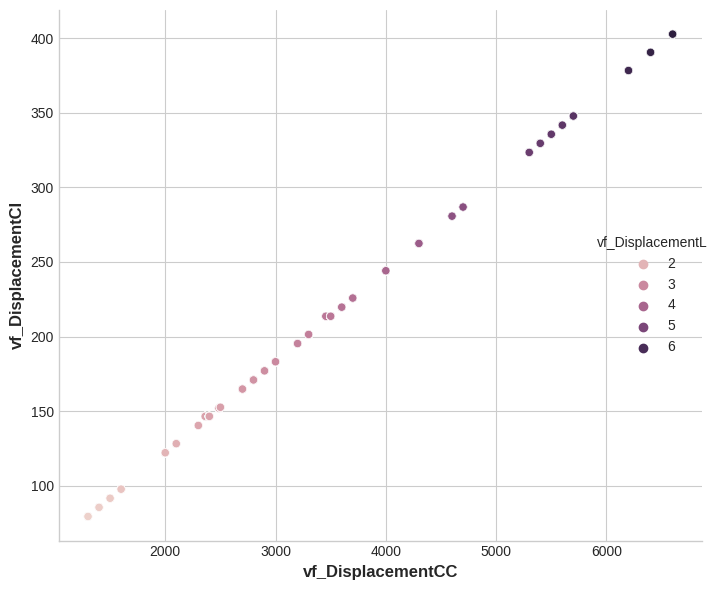

In [ ]:
sns.relplot(
    x="vf_DisplacementCC", y="vf_DisplacementCI", hue="vf_DisplacementL", data=X, height=6,
);

*We can clearly see that there is high-correlated relationship between `vf_DisplacementCC` and `vf_DisplacementCI`*

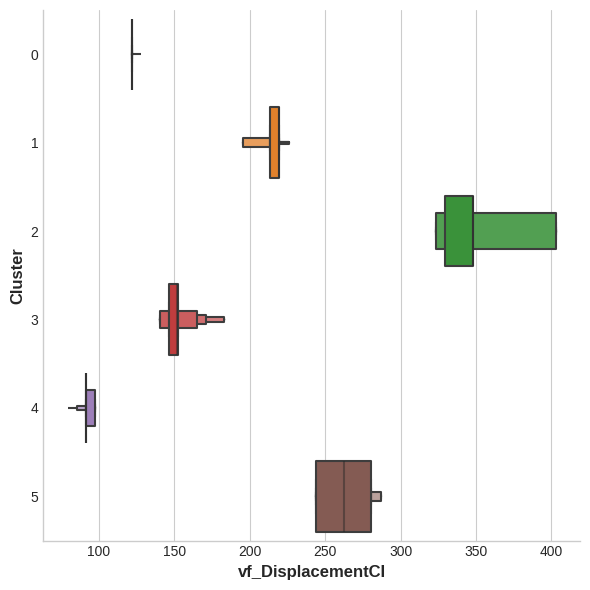

In [ ]:
X["vf_DisplacementCC"] = df["vf_DisplacementCC"]
sns.catplot(x="vf_DisplacementCI", y="Cluster", data=X, kind="boxen", height=6);

### Principle Component Analysis

PCA is a great tool helping to discover important relationships in the data and can also be used to create more informative features.

In [ ]:
pip install -U scikit-learn

Text(0.5, 1.0, 'Correlation Heatmap')

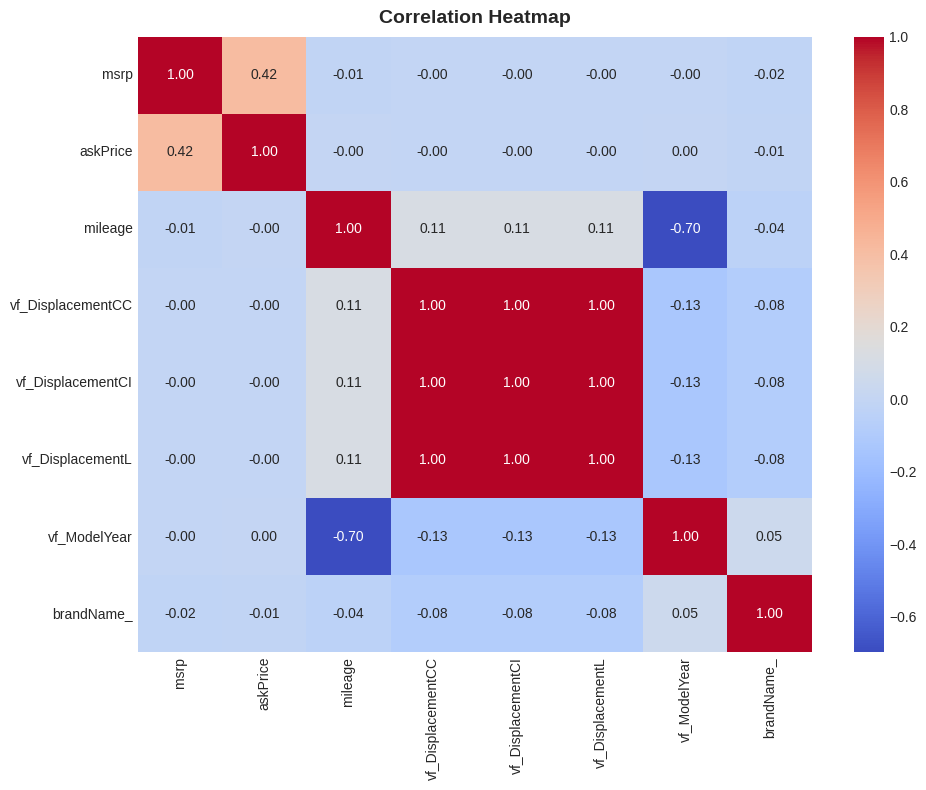

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Use Seaborn's heatmap function to create a correlation heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the plot
plt.title('Correlation Heatmap')

In our dataset, we use vf_DisplacementCC, vf_DisplacementCI, vf_DisplacementL to investigate the relationships between these 3 variables by PCA. Now we can fit scikit-learn's PCA estimator and create the principal components. You can see here the first few rows of the transformed dataset.

In [ ]:
from sklearn.decomposition import PCA
correlated_columns = ['vf_DisplacementCC', 'vf_DisplacementCI', 'vf_DisplacementL']
df2 = df[correlated_columns].copy(deep=True)

pca = PCA(n_components=1)
df_transformed = pca.fit_transform(df2)

Replace the high correlated columns with the resulted PCA component.

In [ ]:
df['vf_DisplacementCombined_CC_CI_L'] = df_transformed

In [ ]:
df.drop(['vf_DisplacementCC', 'vf_DisplacementCI', 'vf_DisplacementL'], axis='columns', inplace=True)

In real life engineering, we will transformed the columns into insightful features to ease the further analysis. Besides, for the columns that have no contribution further will be dropped to improve the runtime complexity for large datasets.

## 7. Visualization

Comparisons between `msrp` and `askPrice`

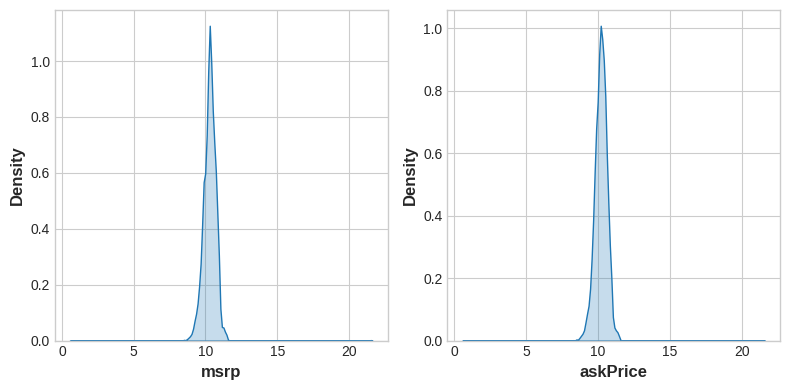

In [ ]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
df["msrp"] = df.msrp.apply(np.log1p)
df["askPrice"] = df.askPrice.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(df.msrp, shade=True, ax=axs[0])
sns.kdeplot(df.askPrice, shade=True, ax=axs[1]);

*From the graph above, we can observe that msrp and askPrice has similar plot pattern. This shows that msrp and askPrice have similar behaviors as the vehicle manafaturing retail price has no much difference with ask price of vehicle.*

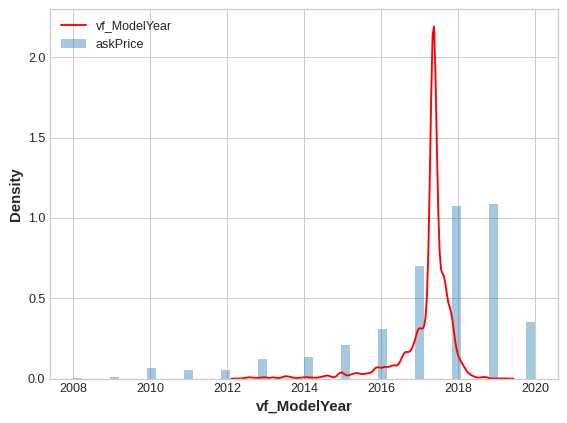

In [ ]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.askPrice, color='r', ax=ax)
ax.set_xlabel("vf_ModelYear")
ax.legend(labels=['vf_ModelYear', 'askPrice']);

*As we can observe in the graph above, the model Year in between 2016 and 2018 has the highest ranked asked price of vehicles as the peak shown. From the graph, we can do further investigation and prediction on the preference of people on prefering the vehicles made in particular years.*

## 8. Conclusion

From the first step import dataset to the end of feature engineering, we can receive and observe many insightful features and information from the process above. We know the the asked price of vehicles has close relationship with the msrp which is the Manufacturer's Suggested Retail Price.

- The analysis of vehicle selling prices, considering columns such as ask price, MSRP (Manufacturer's Suggested Retail Price), and mileage, reveals a complex interplay of factors influencing the market. The ask price, often reflective of market demand and seller preferences, serves as a dynamic indicator that can fluctuate based on various considerations.

- The MSRP, a benchmark set by manufacturers, provides a reference point for buyers and sellers alike. Deviations from the MSRP may signify market dynamics, including promotions, incentives, or adjustments based on vehicle features and specifications.

- Mileage emerges as a critical determinant affecting the selling price. As a measure of a vehicle's wear and tear, mileage plays a pivotal role in shaping buyer perceptions of a car's condition and longevity. Lower mileage tends to be associated with a higher selling price, reflecting the perceived value of a well-maintained and less-used vehicle.

- Overall, the negotiation and determination of a fair selling price involve a delicate balance between these factors. Buyers seek a reasonable price that aligns with the vehicle's condition, features, and market value, while sellers aim to maximize returns based on their investment and market demand.

In essence, the vehicle selling price, when considering ask price, MSRP, and mileage, epitomizes the intricate dynamics of the automotive market. Successful transactions hinge on the understanding and strategic evaluation of these elements, ensuring a fair and satisfactory outcome for both buyers and sellers.